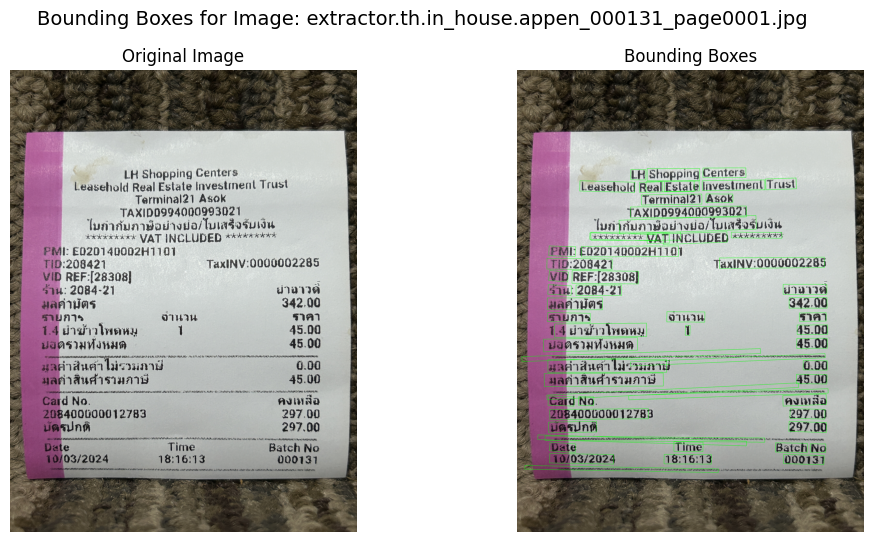

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import json

######################## Variable ########################
# 이미지 번호 선택
desired_number = '000131'  # 원하는 이미지 번호
language = 'thai'  # 선택할 언어: chinese, thai, japanese, vietnamese
##########################################################

# CSV 파일 경로
csv_path = '/home/naring/workplace/code/ensemble_results/experiment_20241106_111642/ensemble_iou0.60_vote2.csv'

# CSV 파일 로드 및 파싱
with open(csv_path, 'r') as file:
    data = json.load(file)

# 이미지 이름 생성
img_name = f"extractor.th.in_house.appen_{desired_number}_page0001.jpg"
img_path = f'./data/{language}_receipt/img/test/{img_name}'

# 이미지 로드
img = cv2.imread(img_path)
if img is None:
    print(f'Unable to load image: {img_name}')
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 이미지에 바운딩 박스 그리기
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Bounding Boxes for Image: {img_name}", fontsize=14, color='black')

    # 왼쪽: 원본 이미지
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # 오른쪽: 바운딩 박스 표시 이미지
    for word, word_data in data['images'][img_name]['words'].items():
        points = word_data['points']
        
        # 바운딩 박스 그리기
        for i in range(4):
            start_point = tuple(map(int, points[i]))
            end_point = tuple(map(int, points[(i + 1) % 4]))
            cv2.line(img, start_point, end_point, color=(0, 255, 0), thickness=2)
    
    axes[1].imshow(img)
    axes[1].set_title('Bounding Boxes')
    axes[1].axis('off')
    
    plt.show()
